# Tool for displaying ROOT histograms inline.

If you are using Anaconda then you need ROOT compiled with Anaconda's python (e.g. add ~/anaconda/bin/ to your $PATH before compiling ROOT).

Put the file rootnotes.py in the directory where you keep your notebooks.  
Import rootnotes into your notebook.  
Use rootnotes.canvas() as a convenience method to create a ROOT canvas outside of your notebook. The ROOT canvas allows you to manipulate histograms that you draw in it.  
Use rootnotes.display_canvas() to embed the current ROOT canvas in your notebook. Embedded canvases cannot be manipulated anymore.

In [1]:
import rootnotes
%matplotlib inline

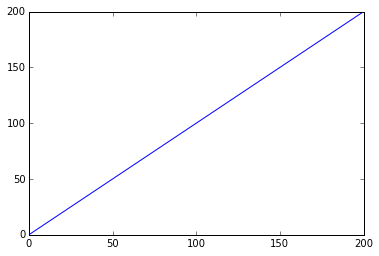

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.arange(0,200,1))

In [3]:
from ROOT import TH1D, TH2D, TCanvas, TRandom
# Create a ROOT canvas
c1 = rootnotes.canvas(name='c2')
#c1.Clear()
# Divide the ROOT canvas in two
c1.Divide(2,1)
# Create a 1D and a 2D histogram
h1 = TH1D("h1", "", 100, -5, 5)
h2 = TH2D("h2", "", 100, -5, 5, 100, -5, 5)
# Fill the histograms with Gaussian random generated data
t = TRandom()
for i in range(0,100000):
    h1.Fill(t.Gaus(0,1))
    a = t.Gaus(0,2)
    b = t.Gaus(a,1)
    h2.Fill(a,b)

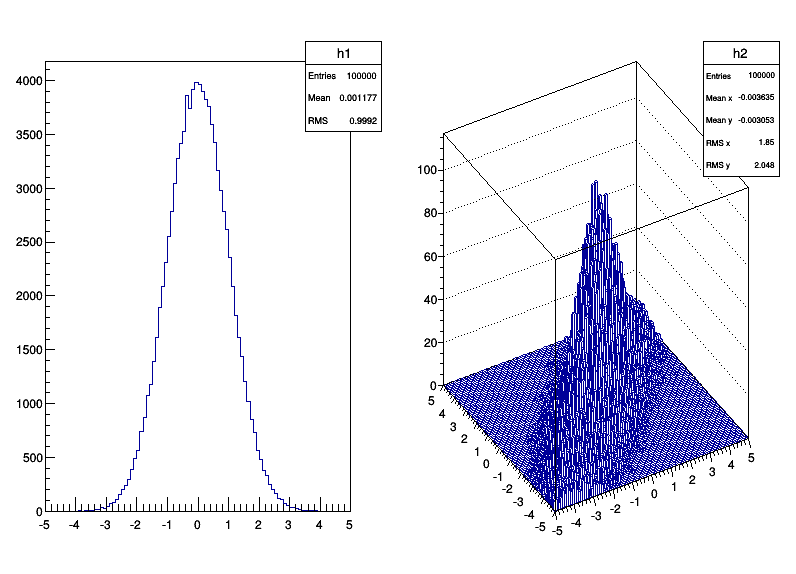

In [4]:
# Draw the 1D histogram in the left side of the ROOT canvas
c1.cd(1)
h1.Draw()
# Draw the 2D histogram in the right side of the ROOT canvas
c1.cd(2)
h2.Draw('lego')
# Probably not necessary but update the ROOT canvas
c1.Update()

# Embed the ROOT canvas inline
rootnotes.display_canvas(c1)

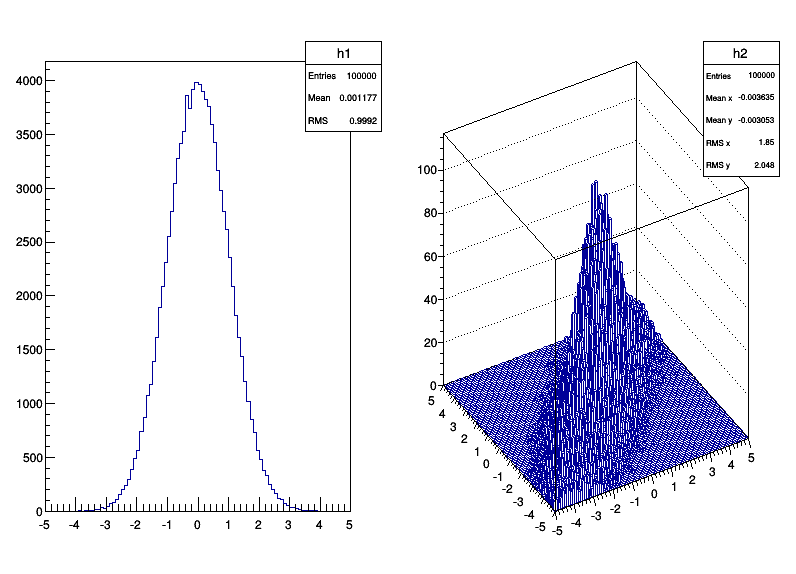

In [5]:
# Embed the changed ROOT canvas inline
rootnotes.display_canvas(c1)

## Now let's convert between pandas and root trees!

In [6]:
from pandas import DataFrame
from root_pandas import read_root

data = [1, 2, 3]

df = DataFrame({'AAA': data, 'ABA': data, 'ABB': data})

df.to_root('/tmp/test.root', 'tree')

df_new = read_root('/tmp/test.root', 'tree', columns=['A{A,B}A'])

# DataFrames are extremely convenient
df_new['answer'] = 42

df_new.to_root('/tmp/new.root')
# The file contains a tree called 'tree' with the 'AAA', 'ABA' and 'answer' branches
# There is also an 'index' branch that persists the DataFrame's index
#so, let's take a look at what we made using root ...

In [7]:
import ROOT

In [8]:
ROOT.TBrowser()

<ROOT.TBrowser object ("Browser") at 0x4b12230>

In [9]:
cbr=rootnotes.canvas("Canvas_ForViewer")
#c1.cd()
#Now try and do something with your TTree viewer, for instance ...

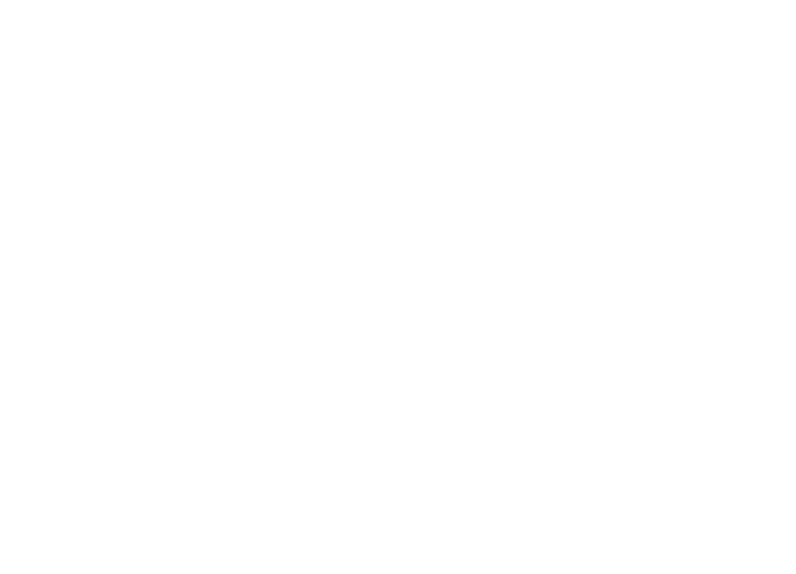

In [10]:
rootnotes.display_canvas(cbr)

# Now let's pickle a python object and save it to a root file!
http://www.rootpy.org/reference/io.pickler.html

In [11]:
import tempfile
f = tempfile.NamedTemporaryFile(delete=False,suffix='test.root')
f.close()

In [12]:
from rootpy.plotting import Hist
from rootpy.io.pickler import dump
hlist = []
for i in range(10):
    hlist.append(Hist(10, 0, 10))
dump(hlist, f.name)
# you can now browse and open this file in the TBrowser, if you want to ... and see it has 10 histograms in it
print f.name

/tmp/tmpAEF0HHtest.root
